In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


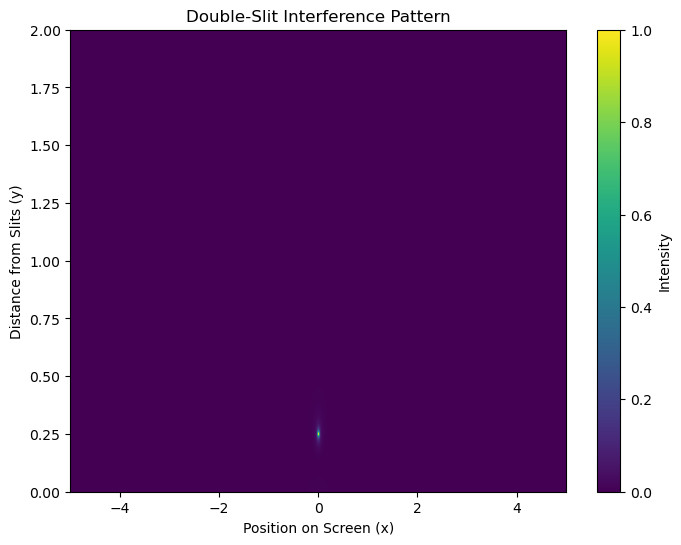

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:

# Constants
L = 2.0  # Distance between slits and screen
slit_separation = 0.15  # Distance between the two slits
wavelength = 0.5  # Wavelength of the particles
k = 2 * np.pi / wavelength  # Wave number

# Grid for simulation
x = np.linspace(-5, 5, 500)  # Screen axis
y = np.linspace(0, L, 500)   # Distance from slits to screen
X, Y = np.meshgrid(x, y)

# Positions of the two slits
slit1 = np.array([0, 0.5 * slit_separation])
slit2 = np.array([0, -0.5 * slit_separation])

# Wavefunction contributions from each slit
def wavefunction(slit_pos, X, Y):
    r = np.sqrt((X - slit_pos[0])**2 + (Y - slit_pos[1])**2)
    return np.exp(1j * k * r) / r

# Total wavefunction
psi = wavefunction(slit1, X, Y) + wavefunction(slit2, X, Y)

# Intensity (probability distribution)
intensity = np.abs(psi)**2
intensity /= np.max(intensity)  # Normalize for better visualization

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(intensity, extent=[-5, 5, 0, L], origin='lower', cmap='viridis', aspect='auto')
ax.set_title("Double-Slit Interference Pattern")
ax.set_xlabel("Position on Screen (x)")
ax.set_ylabel("Distance from Slits (y)")
cb = fig.colorbar(im, ax=ax, label="Intensity")

# Animation function
def update(frame):
    global slit_separation, wavelength
    # Dynamically vary slit separation and wavelength
    slit_separation = 0.5 + 0.5 * np.sin(2 * np.pi * frame / 100)
    wavelength = 0.5 + 0.2 * np.cos(2 * np.pi * frame / 100)
    k = 2 * np.pi / wavelength

    # Update wavefunction
    slit1 = np.array([0, 0.5 * slit_separation])
    slit2 = np.array([0, -0.5 * slit_separation])
    psi = wavefunction(slit1, X, Y) + wavefunction(slit2, X, Y)
    intensity = np.abs(psi)**2
    intensity /= np.max(intensity)  # Normalize
    im.set_data(intensity)
    im.set_clim(0, 1)  # Normalize color range
    return [im]

# Create animation
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Show the animation
plt.show()

# Save the animation as a GIF (optional)
ani.save('double_slit_interference.gif', writer='imagemagick')
